# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
new_cities = []
countries = []
max_temp = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        new_cities.append(response['name'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        pass

In [5]:
weather_dict = {"City": new_cities,
                "Latitude" : lat,
                "Temperature": temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Nevers,46.9896,28.85,42,0,3.09
1,Jamestown,42.0970,20.81,72,100,3.60
2,Rikitea,-23.1203,22.44,71,99,1.80
3,Plácido de Castro,-10.3353,37.22,31,33,2.03
4,Busselton,-33.6500,15.59,89,88,9.92
...,...,...,...,...,...,...
563,Irati,-25.4672,17.08,84,100,0.16
564,Dustlik,40.5247,15.31,30,0,4.02
565,Skibbereen,51.5500,20.06,88,100,5.08
566,Abu Kamal,34.4506,34.62,15,0,1.54


Series of Scatter Plots

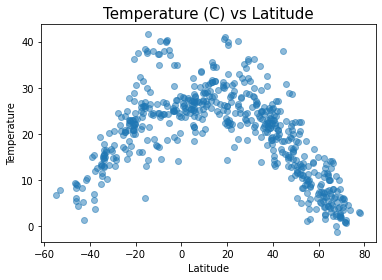

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude
When the latitude increases/decreases, will the temperature move in the same direction as the latitude?


In [6]:
#Temperature (C) vs Latitude
lat_value = weather_data['Latitude']
temp_value = weather_data['Temperature']
plt.scatter(lat_value,temp_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Temperature')
plt.title ("Temperature (C) vs Latitude", fontsize =15)
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude")
print ("When the latitude increases/decreases, will the temperature move in the same direction as the latitude?")

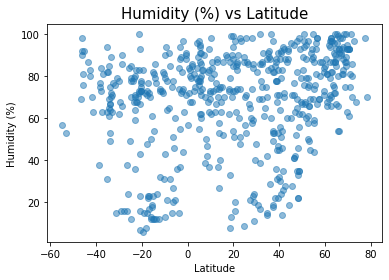

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity and Latitude
When the latitude increases/decreases, will the humidity move in the same direction with the latitude?


In [7]:
#Humidity (%) vs Latitude
humid_value = weather_data['Humidity']
plt.scatter(lat_value,humid_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Humidity (%)')
plt.title ("Humidity (%) vs Latitude", fontsize =15)
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity and Latitude")
print ("When the latitude increases/decreases, will the humidity move in the same direction with the latitude?")

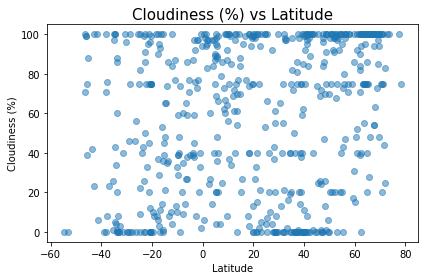

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness and Latitude
When the latitude increases/decreases, will the Cloudiness move in the same direction with the latitude?


In [8]:
# Cloudiness (%) vs Latitude
cloudiness_value = weather_data['Cloudiness']
plt.scatter(lat_value, cloudiness_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness (%)')
plt.title ("Cloudiness (%) vs Latitude", fontsize =15)
plt.tight_layout()
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness and Latitude")
print ("When the latitude increases/decreases, will the Cloudiness move in the same direction with the latitude?")

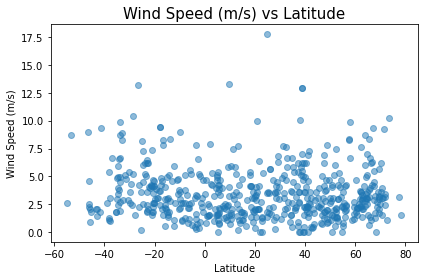

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed and Latitude
When the latitude increases/decreases, will the wind speed move in the same direction with the latitude?


In [9]:
# Wind Speed (m/s) vs Latitude
#Plot in the data to draw scatter plot
wind_value = weather_data['Wind Speed']
plt.scatter(lat_value, wind_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (m/s)')
plt.title ("Wind Speed (m/s) vs Latitude", fontsize =15)
plt.tight_layout()
plt.show()

# Print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed and Latitude")
print ("When the latitude increases/decreases, will the wind speed move in the same direction with the latitude?")

SECOND REQUIREMENT: LINEAR REGRESSION

In [10]:
#Classify into Northern Hemisphere (>=0) & Southern Hemisphere

north_lat = weather_data.loc[weather_data['Latitude'] >=0, :]
south_lat = weather_data.loc[weather_data['Latitude'] < 0, :]

Northern Hemisphere Linear Regression

The r-value is: 0.679


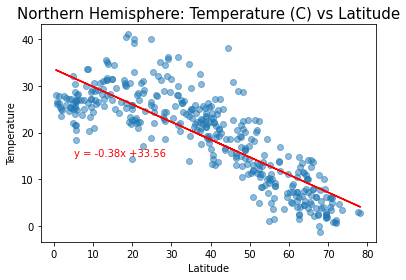

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude
Based on the diagram and the linear regression line, the higher the latitude increase, the lower temperature it will get.
This can be explained when cities locate far away from the equator line, the temperature will decrease when it closes to the north pole
Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition


In [11]:
# Nth Hem. Temperature (C) vs Latitude
#Plot in the data to draw scatter plot
nth_lat_value = north_lat['Latitude']
nth_temp_value = north_lat['Temperature']
plt.scatter(nth_lat_value,nth_temp_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Temperature')
plt.title ("Northern Hemisphere: Temperature (C) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_t,intercept_t, rvalue_t, pvalue_t, stderr_t) = stats.linregress(nth_lat_value, nth_temp_value)

#get regression values:
regress_values_t = nth_lat_value * slope_t + intercept_t

r_value_t = round ((rvalue_t**2),4)

#create line equation string
line_eq_t = "y = " + str(round(slope_t,2)) + "x +" + str(round(intercept_t,2))

# Create plot
plt.plot(nth_lat_value, regress_values_t, "r-")
plt.annotate (line_eq_t, (5,15), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_t}")

plt.tight_layout
plt.show()

# print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude")
print ("Based on the diagram and the linear regression line, the higher the latitude increase, the lower temperature it will get.")
print ("This can be explained when cities locate far away from the equator line, the temperature will decrease when it closes to the north pole")
print ("Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition")

The r-value is: 0.0274


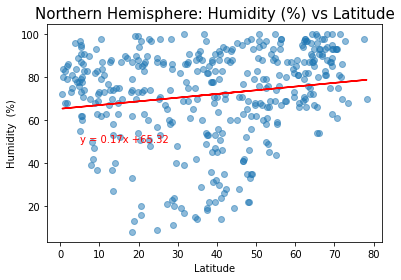

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity (%) and Latitude
Based on the diagram and the linear regression line, the higher the latitude increase, the higher humidity it will get.
This can be explained when cities locate far away from the equator line, the humidty will increase due to less time to expose to the sunlight
Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition


In [12]:
# Nth Hem. Humidity (%) vs Latitude
#Plot in the data to draw scatter plot
nth_humid_value = north_lat['Humidity']
plt.scatter(nth_lat_value,nth_humid_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Humidity  (%)')
plt.title ("Northern Hemisphere: Humidity (%) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_h,intercept_h, rvalue_h, pvalue_h, stderr_h) = stats.linregress(nth_lat_value, nth_humid_value)

#get regression values:
regress_values_h = nth_lat_value * slope_h + intercept_h

r_value_h = round ((rvalue_h**2),4)

#create line equation string
line_eq_h = "y = " + str(round(slope_h,2)) + "x +" + str(round(intercept_h,2))

# Create plot
plt.plot(nth_lat_value, regress_values_h, "r-")
plt.annotate (line_eq_h, (5,50), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_h}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity (%) and Latitude")
print ("Based on the diagram and the linear regression line, the higher the latitude increase, the higher humidity it will get.")
print ("This can be explained when cities locate far away from the equator line, the humidty will increase due to less time to expose to the sunlight")
print ("Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition")

The r-value is: 0.0224


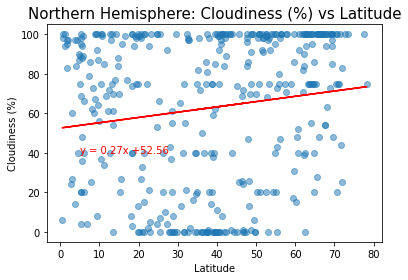

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness (%) and Latitude
Based on the diagram and the linear regression line, the r-value is very small so there is not much relationship between Cloudiness and the Latitude.
Some cities have a very high cloudiness although having very low latitude
Drawback: This conclusion does not take into an account when there are some cities that have high latitude but quite low the percentage of cloudiness


In [13]:
# Nth Hem. Cloudiness (%) vs Latitude
#Plot in the data to draw scatter plot
nth_cloudiness_value = north_lat['Cloudiness']
plt.scatter(nth_lat_value,nth_cloudiness_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness (%)')
plt.title ("Northern Hemisphere: Cloudiness (%) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_c,intercept_c, rvalue_c, pvalue_c, stderr_c) = stats.linregress(nth_lat_value, nth_cloudiness_value)

#get regression values:
regress_values_c = nth_lat_value * slope_c + intercept_c

r_value_c = round ((rvalue_c**2),4)

#create line equation string
line_eq_c = "y = " + str(round(slope_c,2)) + "x +" + str(round(intercept_c,2))

# Create plot
plt.plot(nth_lat_value, regress_values_c, "r-")
plt.annotate (line_eq_c, (5,40), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_c}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness (%) and Latitude")
print ("Based on the diagram and the linear regression line, the r-value is very small so there is not much relationship between Cloudiness and the Latitude.")
print ("Some cities have a very high cloudiness although having very low latitude")
print ("Drawback: This conclusion does not take into an account when there are some cities that have high latitude but quite low the percentage of cloudiness")

The r-value is: 0.0038


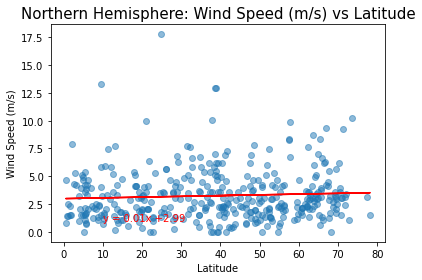

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed (m/s) and Latitude
Based on the diagram and the linear regression line, there is a very low relationship between the wind speed and the latitude.
Some cities have a high latitude but the wind speed is quite low. Some others have a low latitude but get a very high wind speed
Drawback: The regression line sometimes can't explain all the information


In [14]:

#Plot in the data to draw scatter plot
nth_wind_value = north_lat['Wind Speed']
plt.scatter(nth_lat_value,nth_wind_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (m/s)')
plt.title ("Northern Hemisphere: Wind Speed (m/s) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_w,intercept_w, rvalue_w, pvalue_w, stderr_w) = stats.linregress(nth_lat_value, nth_wind_value)

#get regression values:
regress_values_w = nth_lat_value * slope_w + intercept_w

r_value_w = round ((rvalue_w**2),4)

#create line equation string
line_eq_w = "y = " + str(round(slope_w,2)) + "x +" + str(round(intercept_w,2))

# Create plot
plt.plot(nth_lat_value, regress_values_w, "r-")
plt.annotate (line_eq_w, (10,1), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_w}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed (m/s) and Latitude")
print ("Based on the diagram and the linear regression line, there is a very low relationship between the wind speed and the latitude.")
print ("Some cities have a high latitude but the wind speed is quite low. Some others have a low latitude but get a very high wind speed")
print ("Drawback: The regression line sometimes can't explain all the information")

SOUTHERN HEMISPHERE

The r-value is: 0.5066


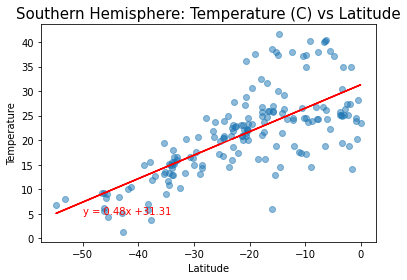

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude
Based on the diagram and the linear regression line, the higher the latitude increase, the higher temperature it will get.
This can be explained when cities locate far away from the equator line, the temperature will decrease when it closes to the south pole
Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition


In [15]:
# Sth Hem. Temperature vs Latitude
#Plot in the data to draw scatter plot
sth_lat_value = south_lat['Latitude']
sth_temp_value = south_lat['Temperature']
plt.scatter(sth_lat_value,sth_temp_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Temperature')
plt.title ("Southern Hemisphere: Temperature (C) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_st,intercept_st, rvalue_st, pvalue_st, stderr_st) = stats.linregress(sth_lat_value, sth_temp_value)

#get regression values:
regress_values_st = sth_lat_value * slope_st + intercept_st

r_value_st = round ((rvalue_st**2),4)

#create line equation string
line_eq_st = "y = " + str(round(slope_st,2)) + "x +" + str(round(intercept_st,2))

# Create plot
plt.plot(sth_lat_value, regress_values_st, "r-")
plt.annotate (line_eq_st, (-50,5), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_st}")

plt.tight_layout
plt.show()

# print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Temperature and Latitude")
print ("Based on the diagram and the linear regression line, the higher the latitude increase, the higher temperature it will get.")
print ("This can be explained when cities locate far away from the equator line, the temperature will decrease when it closes to the south pole")
print ("Drawback: This conclusion does not take into an account when there is some suddent changes in the weather's condition")

The r-value is: 0.0274


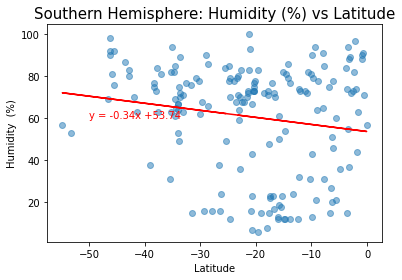

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity (%) and Latitude
Based on the diagram and the linear regression line, the higher the latitude increase, the more humidity it will get.
Drawback: The r-value was very small so there was not much relationship between the latitude and the humidity


In [16]:
# Sth Hem. Humidity (%) vs Latitude
#Plot in the data to draw scatter plot
sth_humid_value = south_lat['Humidity']
plt.scatter(sth_lat_value,sth_humid_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Humidity  (%)')
plt.title ("Southern Hemisphere: Humidity (%) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_sh,intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = stats.linregress(sth_lat_value, sth_humid_value)

#get regression values:
regress_values_sh = sth_lat_value * slope_sh + intercept_sh

r_value_sh = round ((rvalue_sh**2),4)

#create line equation string
line_eq_sh = "y = " + str(round(slope_sh,2)) + "x +" + str(round(intercept_sh,2))

# Create plot
plt.plot(sth_lat_value, regress_values_sh, "r-")
plt.annotate (line_eq_sh, (-50,60), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_sh}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Humidity (%) and Latitude")
print ("Based on the diagram and the linear regression line, the higher the latitude increase, the more humidity it will get.")
print ("Drawback: The r-value was very small so there was not much relationship between the latitude and the humidity")

The r-value is: 0.002


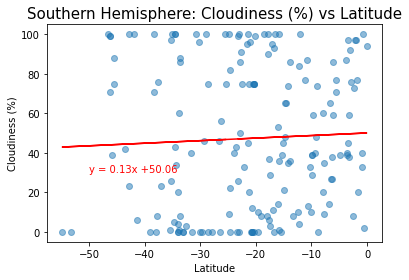

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness (%) and Latitude
Based on the diagram and the linear regression line, there is barely a relationship between Cloudiness percentage and the Latitude.
Drawback: This linear regression cannot reflect how how Cloudiness spread in term of Latitude


In [17]:
# Sth Hem. Cloudiness (%) vs Latitude
#Plot in the data to draw scatter plot
sth_cloudiness_value = south_lat['Cloudiness']
plt.scatter(sth_lat_value,sth_cloudiness_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness (%)')
plt.title ("Southern Hemisphere: Cloudiness (%) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_sc,intercept_sc, rvalue_sc, pvalue_sc, stderr_sc) = stats.linregress(sth_lat_value, sth_cloudiness_value)

#get regression values:
regress_values_sc = sth_lat_value * slope_sc + intercept_sc

r_value_sc = round ((rvalue_sc**2),4)

#create line equation string
line_eq_sc = "y = " + str(round(slope_sc,2)) + "x +" + str(round(intercept_sc,2))

# Create plot
plt.plot(sth_lat_value, regress_values_sc, "r-")
plt.annotate (line_eq_sc, (-50,30), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_sc}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Cloudiness (%) and Latitude")
print ("Based on the diagram and the linear regression line, there is barely a relationship between Cloudiness percentage and the Latitude.")
print ("Drawback: This linear regression cannot reflect how how Cloudiness spread in term of Latitude")

The r-value is: 0.0328


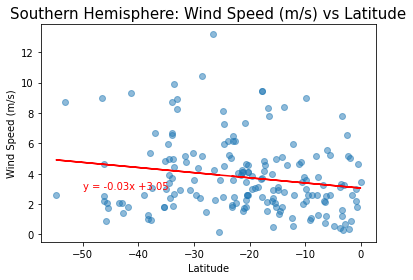

By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed (m/s) and Latitude
Based on the diagram and the linear regression line, there is some sort of small relationship between the wind speed and the lattitude. However, it is not really significant to make a conclusion
Some cities have a low latitude but the wind speed is quite high and vice versa
Drawback: The regression line sometimes can't explain all the information


In [18]:
#Sth Hem. Wind Speed (m/s) vs Latitude
#Plot in the data to draw scatter plot
sth_wind_value = south_lat['Wind Speed']
plt.scatter(sth_lat_value,sth_wind_value, alpha=0.5)
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (m/s)')
plt.title ("Southern Hemisphere: Wind Speed (m/s) vs Latitude", fontsize =15)

#Perform a linear regression on temperature vs Latitude
(slope_sw,intercept_sw, rvalue_sw, pvalue_sw, stderr_sw) = stats.linregress(sth_lat_value, sth_wind_value)

#get regression values:
regress_values_sw = sth_lat_value * slope_sw + intercept_sw

r_value_sw = round ((rvalue_sw**2),4)

#create line equation string
line_eq_sw = "y = " + str(round(slope_sw,2)) + "x +" + str(round(intercept_sw,2))

# Create plot
plt.plot(sth_lat_value, regress_values_sw, "r-")
plt.annotate (line_eq_sw, (-50,3), fontsize = 10, color = "red")

#print r value:
print (f"The r-value is: {r_value_sw}")

plt.tight_layout
plt.show()

#print out explanation
print ("By using the Scatter Plots in Matplotlib, we try to analyse whether there is any trend movement/relationship between the Wind Speed (m/s) and Latitude")
print ("Based on the diagram and the linear regression line, there is some sort of small relationship between the wind speed and the lattitude. However, it is not really significant to make a conclusion")
print ("Some cities have a low latitude but the wind speed is quite high and vice versa")
print ("Drawback: The regression line sometimes can't explain all the information")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#export output as txt file:
#sort city file in order as per question requied   
weather_exp_dict = {
                "City": new_cities,
                "Latitude" : lat,
                "Longitude": lng,
                "Max Temp": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": countries,
                "Date": date}
weather_exp = pd.DataFrame(weather_exp_dict)

#adding index name to the dataframe before printing out
weather_exp.index.name = "City_ID"

#export city data into a .csv
weather_exp.to_csv(output_data_file)    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression